In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

## 1. About the data

### 1.1. Getting Data

In [49]:
#read a sample of 5000 random rows due to the large dataset
df_sample_train = pd.read_csv('../input/train.csv').sample(5000)
#separate the data from the label
X_sample_train, y_sample_train = df_sample_train.drop(columns=['label']), df_sample_train.label

### 1.2. Data Exploration

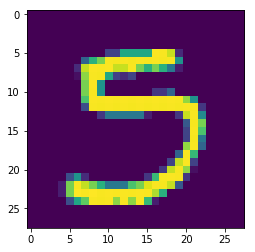

1    11.18
2    10.70
3    10.34
7    10.12
0    10.12
8    10.00
6     9.92
4     9.74
9     9.56
5     8.32
Name: label, dtype: float64

In [50]:
#plot one of the rows of the dataset
im_index = 5
first_image = X_sample_train.iloc[29].values.reshape(28,28)
plt.imshow(first_image)
plt.show()

#class distribution for the data set (percentage of total)
y_sample_train.value_counts(normalize=True, sort = True).apply(lambda x: x*100)

## 2. Model Selection

### 2.1. Split into train and test set (60/40)

#### Split the data set

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_sample_train, y_sample_train, test_size=0.4)
print("Size of training set: ", X_train.shape, "\nSize of test set: ", X_test.shape)

Size of training set:  (3000, 784) 
Size of test set:  (2000, 784)


#### Class Distribution

In [52]:
#original data set
print("Class distribution in the original training set:\n", y_sample_train.value_counts(normalize=True, sort = True)
      .apply(lambda x: x*100))
print()

#splitted training set
print("Class distribution in the splitted training set:\n", y_train.value_counts(normalize=True, sort = True)
      .apply(lambda x: x*100))

Class distribution in the original training set:
 1    11.18
2    10.70
3    10.34
7    10.12
0    10.12
8    10.00
6     9.92
4     9.74
9     9.56
5     8.32
Name: label, dtype: float64

Class distribution in the splitted training set:
 1    11.466667
7    10.400000
2    10.400000
4    10.233333
6    10.133333
3    10.100000
0    10.066667
8     9.933333
9     8.766667
5     8.500000
Name: label, dtype: float64


### 2.2. Stratified split into train and test set (60/40)

#### Split the data set

In [57]:
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X_sample_train, y_sample_train, test_size=0.4,
                                                                            stratify = y_sample_train)

#### Class Distribution

In [58]:
print("Stratified class distribution\n", y_train_strat.value_counts(normalize=True, sort = True).apply(lambda x: x*100))


Stratified class distribution
 1    11.166667
2    10.700000
3    10.333333
7    10.133333
0    10.133333
8    10.000000
6     9.933333
4     9.733333
9     9.566667
5     8.300000
Name: label, dtype: float64


## 2.3 Cross Validation

#### K-fold Cross-validation

In [59]:
#split the data set into 5 folds
kf = KFold(n_splits=5)
kf_set = kf.split(X_sample_train, y_sample_train)

#check the size of train and test set and, the number of partitions
for train, test in kf_set:
    print(train.size, test.size)

4000 1000
4000 1000
4000 1000
4000 1000
4000 1000


#### Leave One Out (LOO) Cross-validation

In [60]:
loo = LeaveOneOut()
loo_set = loo.split(X_sample_train, y_sample_train)
